# 03 Ranker data preprocessing

Combine candidates with articles and features data to be used as input to ranker.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import logging
import pandas as pd

sys.path.append("..")

from src.utils.core_utils import setup_logging

In [3]:
# Initialize logging
file_log = "ranker_data_preprocessing.log"
root_logger = setup_logging(level=logging.DEBUG, log_file=file_log, remove_existing=True)

2025-06-05 12:45:36,952 - src.utils.core_utils - INFO - Creating file handler with level: 10
2025-06-05 12:45:36,954 - src.utils.core_utils - DEBUG - Logging setup complete to ranker_data_preprocessing.log


In [4]:
from src.input_preprocessing import LightGBMDataProcessorConfig, LightGBMDataPipeline

/Users/sharonshiao/Dropbox/Machine_learning/projects/fahsion_recommendation/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Preprocess


In [5]:
data_processor_config_train = LightGBMDataProcessorConfig.create_default("train")
data_processor_config_valid = LightGBMDataProcessorConfig.create_default("valid")
data_processor_config_test = LightGBMDataProcessorConfig.create_default("test")

In [6]:
data_pipeline_train = LightGBMDataPipeline(data_processor_config_train)
data_pipeline_valid = LightGBMDataPipeline(data_processor_config_valid)
data_pipeline_test = LightGBMDataPipeline(data_processor_config_test)

In [7]:
data_pipeline_train = data_pipeline_train.setup()

2025-06-05 12:45:44,162 - src.input_preprocessing - INFO - Setting up LightGBMDataPipeline
2025-06-05 12:45:44,163 - src.input_preprocessing - INFO - Setting up LightGBMDataPipeline
2025-06-05 12:45:44,163 - src.input_preprocessing - DEBUG - Using configuration: {
  "sample": "train",
  "include_article_static_features": true,
  "include_article_dynamic_features": true,
  "include_customer_static_features": true,
  "include_customer_dynamic_features": true,
  "include_transaction_features": true,
  "include_user_history": false,
  "use_default_data_paths": true,
  "subsample": 0.25,
  "seed": 42,
  "data_paths": {
    "candidates": "",
    "article_features": "",
    "customer_features": ""
  }
}


In [8]:
results_train, _ = data_pipeline_train.run()

2025-06-05 12:45:44,187 - src.input_preprocessing - INFO - Using default data paths
2025-06-05 12:45:44,188 - src.input_preprocessing - INFO - Loading data from disk
2025-06-05 12:45:44,189 - src.candidate_generator - INFO - Loading CandidateGeneratorResult from ../data/preprocessed/candidate_generator/train/subsample_0.25_42
2025-06-05 12:45:44,190 - src.candidate_generator - INFO - Metadata loaded: {'has_label': True, 'columns': ['customer_id', 'week_num', 'article_id', 'price', 'sales_channel_id', 'source', 'label', 'week', 'year', 'month', 'bestseller_rank'], 'feature_name_keys': ['categorical_features', 'numerical_features', 'one_hot_features', 'id_columns', 'metadata_columns', 'target_columns'], 'has_data_inference': False, 'has_default_predictions': False, 'sample': 'train'}
2025-06-05 12:45:44,472 - src.candidate_generator - INFO - CandidateGeneratorResult data loaded from ../data/preprocessed/candidate_generator/train/subsample_0.25_42/data.parquet
2025-06-05 12:45:44,488 - sr

In [9]:
data_pipeline_valid = data_pipeline_valid.setup()

2025-06-05 12:46:18,602 - src.input_preprocessing - INFO - Setting up LightGBMDataPipeline
2025-06-05 12:46:18,603 - src.input_preprocessing - INFO - Setting up LightGBMDataPipeline
2025-06-05 12:46:18,603 - src.input_preprocessing - DEBUG - Using configuration: {
  "sample": "valid",
  "include_article_static_features": true,
  "include_article_dynamic_features": true,
  "include_customer_static_features": true,
  "include_customer_dynamic_features": true,
  "include_transaction_features": true,
  "include_user_history": false,
  "use_default_data_paths": true,
  "subsample": 0.25,
  "seed": 42,
  "data_paths": {
    "candidates": "",
    "article_features": "",
    "customer_features": ""
  }
}


In [10]:
results_valid_train, results_valid_inference = data_pipeline_valid.run()

2025-06-05 12:46:18,623 - src.input_preprocessing - INFO - Using default data paths
2025-06-05 12:46:18,624 - src.input_preprocessing - INFO - Loading data from disk
2025-06-05 12:46:18,624 - src.candidate_generator - INFO - Loading CandidateGeneratorResult from ../data/preprocessed/candidate_generator/valid/subsample_0.25_42
2025-06-05 12:46:18,625 - src.candidate_generator - INFO - Metadata loaded: {'has_label': True, 'columns': ['customer_id', 'week_num', 'article_id', 'price', 'sales_channel_id', 'source', 'label', 'week', 'year', 'month', 'bestseller_rank'], 'feature_name_keys': ['categorical_features', 'numerical_features', 'one_hot_features', 'id_columns', 'metadata_columns', 'target_columns'], 'has_data_inference': True, 'has_default_predictions': True, 'sample': 'valid'}
2025-06-05 12:46:18,648 - src.candidate_generator - INFO - CandidateGeneratorResult data loaded from ../data/preprocessed/candidate_generator/valid/subsample_0.25_42/data.parquet
2025-06-05 12:46:18,695 - src.

In [11]:
data_pipeline_test = data_pipeline_test.setup()

2025-06-05 12:46:47,421 - src.input_preprocessing - INFO - Setting up LightGBMDataPipeline
2025-06-05 12:46:47,422 - src.input_preprocessing - INFO - Setting up LightGBMDataPipeline
2025-06-05 12:46:47,422 - src.input_preprocessing - DEBUG - Using configuration: {
  "sample": "test",
  "include_article_static_features": true,
  "include_article_dynamic_features": true,
  "include_customer_static_features": true,
  "include_customer_dynamic_features": true,
  "include_transaction_features": true,
  "include_user_history": false,
  "use_default_data_paths": true,
  "subsample": 0.25,
  "seed": 42,
  "data_paths": {
    "candidates": "",
    "article_features": "",
    "customer_features": ""
  }
}


In [12]:
_, results_test_inference = data_pipeline_test.run()

2025-06-05 12:46:47,442 - src.input_preprocessing - INFO - Using default data paths
2025-06-05 12:46:47,443 - src.input_preprocessing - INFO - Loading data from disk
2025-06-05 12:46:47,443 - src.candidate_generator - INFO - Loading CandidateGeneratorResult from ../data/preprocessed/candidate_generator/test/subsample_0.25_42
2025-06-05 12:46:47,445 - src.candidate_generator - INFO - Metadata loaded: {'has_label': True, 'columns': ['customer_id', 'week_num', 'article_id', 'price', 'sales_channel_id', 'source', 'label', 'week', 'year', 'month', 'bestseller_rank'], 'feature_name_keys': ['categorical_features', 'numerical_features', 'one_hot_features', 'id_columns', 'metadata_columns', 'target_columns'], 'has_data_inference': True, 'has_default_predictions': True, 'sample': 'test'}
2025-06-05 12:46:47,465 - src.candidate_generator - INFO - CandidateGeneratorResult data loaded from ../data/preprocessed/candidate_generator/test/subsample_0.25_42/data.parquet
2025-06-05 12:46:47,519 - src.can

# Debug


## Check output shapes and meta


In [13]:
from src.candidate_generator import CandidateGeneratorResult, get_path_to_candidates
from src.utils.data_checks import test_lightgbm_data_pipeline_metadata

2025-06-05 12:47:16,392 - matplotlib - DEBUG - matplotlib data path: /Users/sharonshiao/Dropbox/Machine_learning/projects/fahsion_recommendation/venv/lib/python3.12/site-packages/matplotlib/mpl-data
2025-06-05 12:47:16,399 - matplotlib - DEBUG - CONFIGDIR=/Users/sharonshiao/.matplotlib
2025-06-05 12:47:16,467 - matplotlib - DEBUG - interactive is False
2025-06-05 12:47:16,468 - matplotlib - DEBUG - platform is darwin
2025-06-05 12:47:16,667 - matplotlib - DEBUG - CACHEDIR=/Users/sharonshiao/.matplotlib
2025-06-05 12:47:16,675 - matplotlib.font_manager - DEBUG - Using fontManager instance from /Users/sharonshiao/.matplotlib/fontlist-v390.json


In [14]:
subsample = data_processor_config_train.subsample
seed = data_processor_config_train.seed

In [15]:
path_to_candidates_train = get_path_to_candidates(sample="train", subsample=subsample, seed=seed)
path_to_candidates_valid = get_path_to_candidates(sample="valid", subsample=subsample, seed=seed)
path_to_candidates_test = get_path_to_candidates(sample="test", subsample=subsample, seed=seed)
candidates_train = CandidateGeneratorResult.load(path_to_candidates_train)
candidates_valid = CandidateGeneratorResult.load(path_to_candidates_valid)
candidates_test = CandidateGeneratorResult.load(path_to_candidates_test)

2025-06-05 12:47:17,583 - src.candidate_generator - INFO - Loading CandidateGeneratorResult from ../data/preprocessed/candidate_generator/train/subsample_0.25_42
2025-06-05 12:47:17,587 - src.candidate_generator - INFO - Metadata loaded: {'has_label': True, 'columns': ['customer_id', 'week_num', 'article_id', 'price', 'sales_channel_id', 'source', 'label', 'week', 'year', 'month', 'bestseller_rank'], 'feature_name_keys': ['categorical_features', 'numerical_features', 'one_hot_features', 'id_columns', 'metadata_columns', 'target_columns'], 'has_data_inference': False, 'has_default_predictions': False, 'sample': 'train'}
2025-06-05 12:47:17,651 - src.candidate_generator - INFO - CandidateGeneratorResult data loaded from ../data/preprocessed/candidate_generator/train/subsample_0.25_42/data.parquet
2025-06-05 12:47:17,690 - src.candidate_generator - INFO - CandidateGeneratorResult label loaded from ../data/preprocessed/candidate_generator/train/subsample_0.25_42/label.npy
2025-06-05 12:47:

In [16]:
test_lightgbm_data_pipeline_metadata(results_train, candidates_train)

test_lightgbm_data_pipeline_metadata(results_valid_train, candidates_valid)
test_lightgbm_data_pipeline_metadata(results_valid_inference, candidates_valid)

test_lightgbm_data_pipeline_metadata(results_test_inference, candidates_test)

Results use type: train, candidates sample: train
Checking week range
Checking number of customers
Checking number of articles
Checking number of rows
Checking no duplicate customer_id, article_id, week_num
Checks passed
Results use type: train, candidates sample: valid
Checking week range
Checking number of customers
Checking number of articles
Checking number of rows
Checking no duplicate customer_id, article_id, week_num
Checks passed
Results use type: inference, candidates sample: valid
Checking week range
Checking number of customers
Checking number of articles
Checking number of rows
Checking no duplicate customer_id, article_id, week_num
Checks passed
Results use type: inference, candidates sample: test
Checking week range
Checking number of customers
Checking number of articles
Checking number of rows
Checking no duplicate customer_id, article_id, week_num
Checks passed


In [17]:
print(results_train.data.shape)
print(results_valid_train.data.shape)
print(results_valid_inference.data.shape)

(1062302, 37)
(113942, 37)
(678339, 36)


In [18]:
print(results_train.data.columns)
print(results_valid_train.data.columns)
print(results_valid_inference.data.columns)

Index(['month', 'price', 'week_num', 'bestseller_rank', 'customer_id',
       'article_id', 'week', 'source', 'label', 'product_type_no',
       'graphical_appearance_no', 'colour_group_code',
       'perceived_colour_value_id', 'perceived_colour_master_id',
       'department_no', 'index_code', 'index_group_no', 'section_no',
       'garment_group_no', 'fn', 'active', 'age', 'club_member_status',
       'fashion_news_frequency', 'postal_code', 'age_bin',
       'customer_avg_price', 'text_embedding_similarity',
       'image_embedding_similarity', 'weekly_sales_count', 'weekly_avg_price',
       'cumulative_mean_age', 'cumulative_sales_count', 'age_difference',
       'age_ratio', 'price_difference', 'price_ratio'],
      dtype='object')
Index(['month', 'price', 'week_num', 'bestseller_rank', 'customer_id',
       'article_id', 'week', 'source', 'label', 'product_type_no',
       'graphical_appearance_no', 'colour_group_code',
       'perceived_colour_value_id', 'perceived_colour_mast

In [19]:
print(results_test_inference.data.shape)
print(results_test_inference.data.columns)

(656391, 36)
Index(['month', 'price', 'week_num', 'bestseller_rank', 'customer_id',
       'article_id', 'week', 'source', 'product_type_no',
       'graphical_appearance_no', 'colour_group_code',
       'perceived_colour_value_id', 'perceived_colour_master_id',
       'department_no', 'index_code', 'index_group_no', 'section_no',
       'garment_group_no', 'fn', 'active', 'age', 'club_member_status',
       'fashion_news_frequency', 'postal_code', 'age_bin',
       'customer_avg_price', 'text_embedding_similarity',
       'image_embedding_similarity', 'weekly_sales_count', 'weekly_avg_price',
       'cumulative_mean_age', 'cumulative_sales_count', 'age_difference',
       'age_ratio', 'price_difference', 'price_ratio'],
      dtype='object')


In [20]:
results_test_inference.get_feature_names_list()

['price',
 'week_num',
 'bestseller_rank',
 'weekly_sales_count',
 'weekly_avg_price',
 'cumulative_mean_age',
 'cumulative_sales_count',
 'fn',
 'active',
 'age',
 'customer_avg_price',
 'text_embedding_similarity',
 'image_embedding_similarity',
 'age_difference',
 'age_ratio',
 'price_difference',
 'price_ratio',
 'month',
 'product_type_no',
 'graphical_appearance_no',
 'colour_group_code',
 'perceived_colour_value_id',
 'perceived_colour_master_id',
 'department_no',
 'index_code',
 'index_group_no',
 'section_no',
 'garment_group_no',
 'club_member_status',
 'fashion_news_frequency',
 'postal_code',
 'age_bin']

In [21]:
results_train.use_type, results_valid_train.use_type, results_valid_inference.use_type, results_test_inference.use_type

('train', 'train', 'inference', 'inference')

## Check feature distribution


In [22]:
from src.utils.data_checks import test_input_articles_dynamic_features
from src.features_articles import ArticleDynamicFeatureResult, ArticleEmbeddingResult, get_path_to_article_features
from src.utils.data_checks import test_lightgbm_data_features
from src.feature_customers import CustomerDynamicFeatureResult, get_path_to_customers_features

path_to_customers_features_train = get_path_to_customers_features(
    feature_type="dynamic", subsample=subsample, seed=seed
)
customer_dynamic_features = CustomerDynamicFeatureResult.load(path_to_customers_features_train)


path_to_article_features_train = get_path_to_article_features(feature_type="embedding", subsample=1, seed=42)
article_embeddings = ArticleEmbeddingResult.load(path_to_article_features_train)

2025-06-05 12:47:18,326 - src.feature_customers - INFO - Loading customer dynamic feature result from ../data/preprocessed/customers_dynamic/subsample_0.25_42
2025-06-05 12:47:41,366 - src.feature_customers - INFO - Loaded data from ../data/preprocessed/customers_dynamic/subsample_0.25_42/data.parquet
2025-06-05 12:47:41,436 - src.feature_customers - INFO - Loaded feature names from ../data/preprocessed/customers_dynamic/subsample_0.25_42/feature_names.json
2025-06-05 12:47:41,437 - src.features_articles - INFO - Loading article embedding result from ../data/preprocessed/articles_embedding/full
2025-06-05 12:47:41,562 - src.features_articles - INFO - Loaded text embeddings from ../data/preprocessed/articles_embedding/full/text_embeddings.npy
2025-06-05 12:47:41,629 - src.features_articles - INFO - Loaded image embeddings from ../data/preprocessed/articles_embedding/full/image_embeddings.npy
2025-06-05 12:47:41,631 - src.features_articles - INFO - Loaded image missing flags from ../data

Results use type: train, sample: train
Checking no missing values
Checking no duplicate columns
Feature: price
count    1.062302e+06
mean     2.416159e-02
std      1.398163e-02
min      1.355932e-04
25%      1.438983e-02
50%      2.286441e-02
75%      3.271398e-02
max      5.067797e-01
Name: price, dtype: float64


2025-06-05 12:47:41,994 - matplotlib.pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-06-05 12:47:41,995 - matplotlib.pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-06-05 12:47:41,999 - matplotlib.font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2025-06-05 12:47:41,999 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/Users/sharonshiao/Dropbox/Machine_learning/projects/fahsion_recommendation/venv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
2025-06-05 12:47:42,000 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/Users/sharonshiao/Dropbox/Machine_learning/projects/fahsion_recommendation/venv/lib/python3.12/site-packages/matplotlib/mpl-data/fon

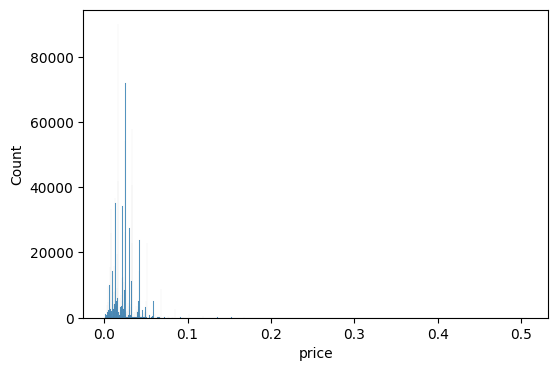

--------------------------------------------------------------------------------
Feature: week_num
count    1.062302e+06
mean     9.764244e+01
std      2.875446e+00
min      9.300000e+01
25%      9.500000e+01
50%      9.800000e+01
75%      1.000000e+02
max      1.020000e+02
Name: week_num, dtype: float64


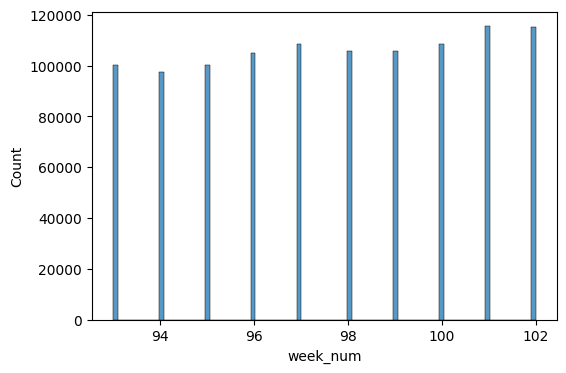

--------------------------------------------------------------------------------
Feature: bestseller_rank
count    1.062302e+06
mean     5.741808e+02
std      4.883561e+02
min      1.000000e+00
25%      1.500000e+01
50%      9.990000e+02
75%      9.990000e+02
max      9.990000e+02
Name: bestseller_rank, dtype: float64


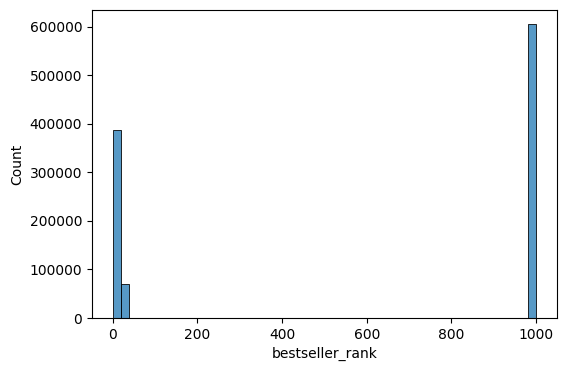

--------------------------------------------------------------------------------
Feature: weekly_sales_count
count    1.062302e+06
mean     5.421037e+01
std      5.784126e+01
min      0.000000e+00
25%      3.000000e+00
50%      2.600000e+01
75%      9.500000e+01
max      3.050000e+02
Name: weekly_sales_count, dtype: float64


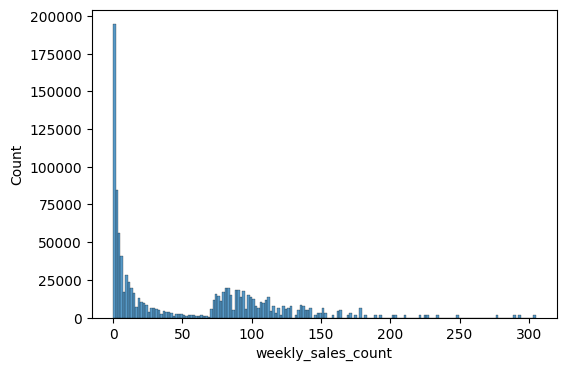

--------------------------------------------------------------------------------
Feature: weekly_avg_price
count    1.062302e+06
mean     2.301216e-02
std      1.276962e-02
min      3.389831e-04
25%      1.354237e-02
50%      2.201695e-02
75%      3.027119e-02
max      5.067797e-01
Name: weekly_avg_price, dtype: float64


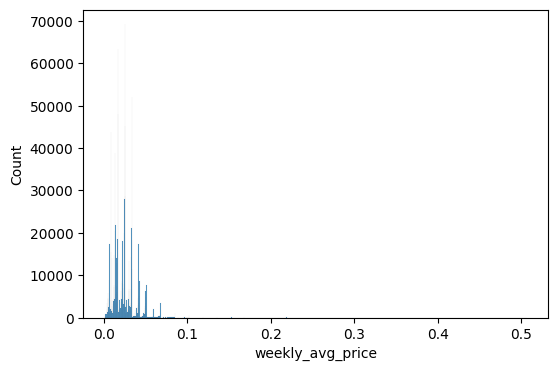

--------------------------------------------------------------------------------
Feature: cumulative_mean_age
count    1.062302e+06
mean     3.433311e+01
std      3.869288e+00
min      1.300000e+01
25%      3.168567e+01
50%      3.339541e+01
75%      3.638961e+01
max      7.600000e+01
Name: cumulative_mean_age, dtype: float64


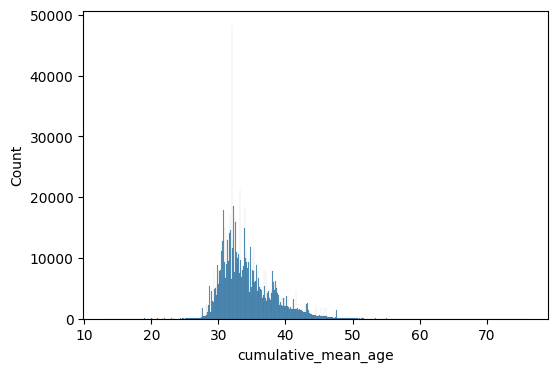

--------------------------------------------------------------------------------
Feature: cumulative_sales_count
count    1.062302e+06
mean     7.202302e+02
std      1.035580e+03
min      0.000000e+00
25%      1.370000e+02
50%      3.420000e+02
75%      8.330000e+02
max      7.225000e+03
Name: cumulative_sales_count, dtype: float64


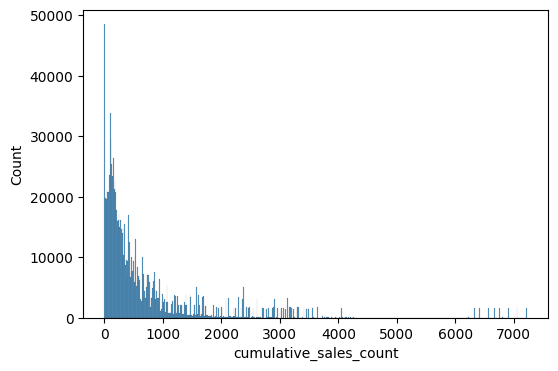

--------------------------------------------------------------------------------
Feature: fn
count    1.062302e+06
mean     4.526594e-01
std      4.977541e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: fn, dtype: float64


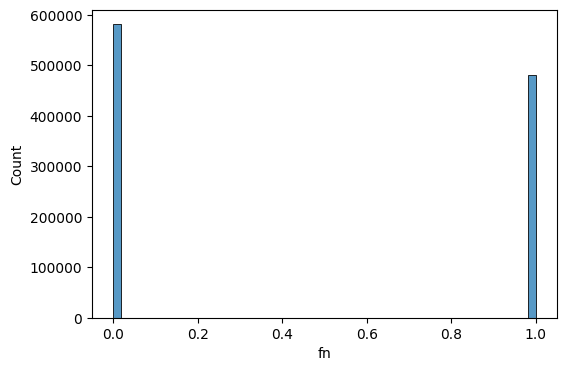

--------------------------------------------------------------------------------
Feature: active
count    1.062302e+06
mean     4.458986e-01
std      4.970647e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: active, dtype: float64


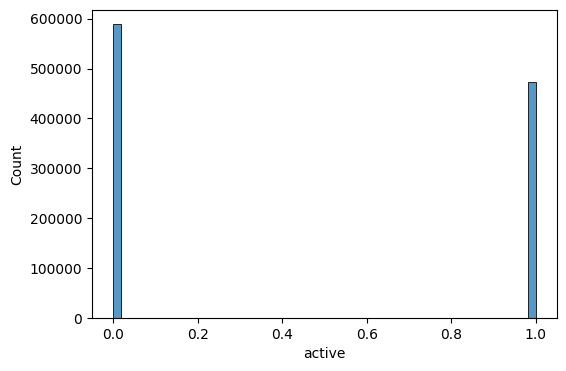

--------------------------------------------------------------------------------
Feature: age
count    1.062302e+06
mean     3.506203e+01
std      1.341321e+01
min      1.600000e+01
25%      2.400000e+01
50%      3.000000e+01
75%      4.700000e+01
max      9.900000e+01
Name: age, dtype: float64


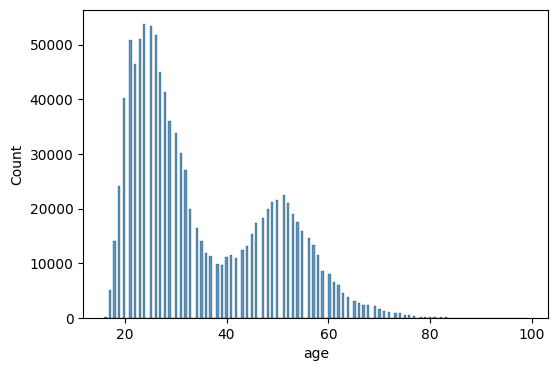

--------------------------------------------------------------------------------
Feature: customer_avg_price
count    1.062302e+06
mean     2.486135e-02
std      1.029673e-02
min      8.983051e-04
25%      1.820339e-02
50%      2.345763e-02
75%      2.913559e-02
max      2.781356e-01
Name: customer_avg_price, dtype: float64


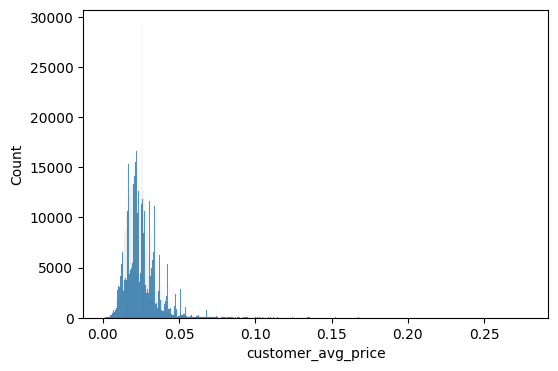

--------------------------------------------------------------------------------
Feature: text_embedding_similarity
count    1.062302e+06
mean     9.151096e-01
std      1.903097e-01
min      0.000000e+00
25%      9.384071e-01
50%      9.568252e-01
75%      9.709423e-01
max      1.000000e+00
Name: text_embedding_similarity, dtype: float64


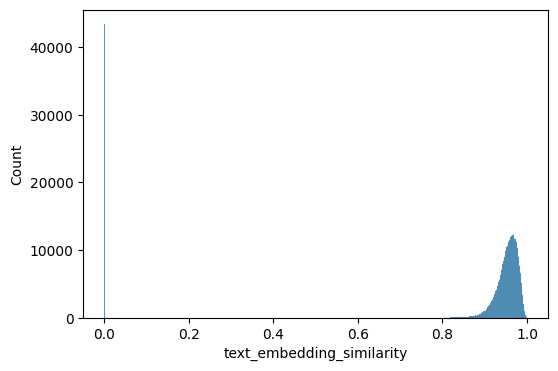

--------------------------------------------------------------------------------
Feature: image_embedding_similarity
count    1.062302e+06
mean     7.257547e-01
std      1.824941e-01
min      0.000000e+00
25%      6.822115e-01
50%      7.605660e-01
75%      8.305543e-01
max      1.000000e+00
Name: image_embedding_similarity, dtype: float64


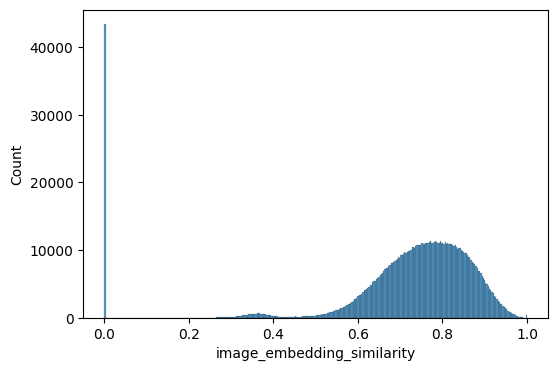

--------------------------------------------------------------------------------
Feature: age_difference
count    1.062302e+06
mean     7.289163e-01
std      1.328351e+01
min     -3.220909e+01
25%     -9.556869e+00
50%     -3.466126e+00
75%      1.142871e+01
max      6.577840e+01
Name: age_difference, dtype: float64


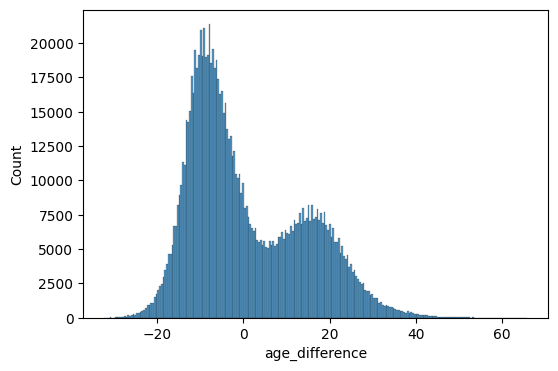

--------------------------------------------------------------------------------
Feature: age_ratio
count    1.062302e+06
mean    -1.116483e-01
std      3.833866e-01
min     -1.801164e+00
25%     -3.976592e-01
50%     -1.178407e-01
75%      2.426535e-01
max      6.956944e-01
Name: age_ratio, dtype: float64


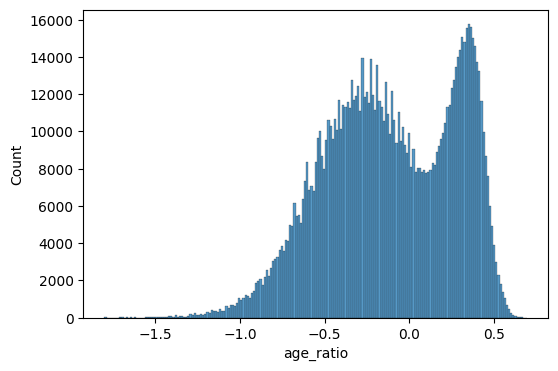

--------------------------------------------------------------------------------
Feature: price_difference
count    1.062302e+06
mean    -6.997588e-04
std      1.488095e-02
min     -2.651504e-01
25%     -9.152543e-03
50%     -1.288135e-03
75%      7.322034e-03
max      3.769627e-01
Name: price_difference, dtype: float64


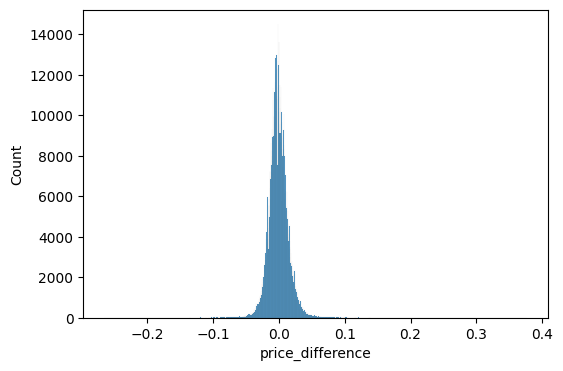

--------------------------------------------------------------------------------
Feature: price_ratio
count    1.062302e+06
mean     6.526947e-02
std      6.804968e-01
min     -9.877301e-01
25%     -3.759627e-01
50%     -5.665728e-02
75%      3.335558e-01
max      4.533012e+01
Name: price_ratio, dtype: float64


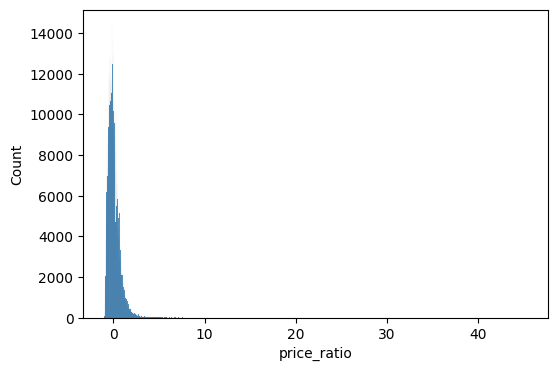

--------------------------------------------------------------------------------
Feature: month
count    1.062302e+06
mean     7.627113e+00
std      6.713785e-01
min      7.000000e+00
25%      7.000000e+00
50%      8.000000e+00
75%      8.000000e+00
max      9.000000e+00
Name: month, dtype: float64


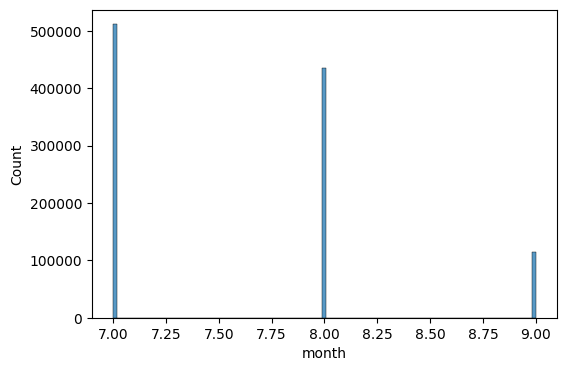

--------------------------------------------------------------------------------
Feature: product_type_no
count    1.062302e+06
mean     3.452139e+01
std      2.676947e+01
min      0.000000e+00
25%      1.400000e+01
50%      2.900000e+01
75%      4.700000e+01
max      1.300000e+02
Name: product_type_no, dtype: float64


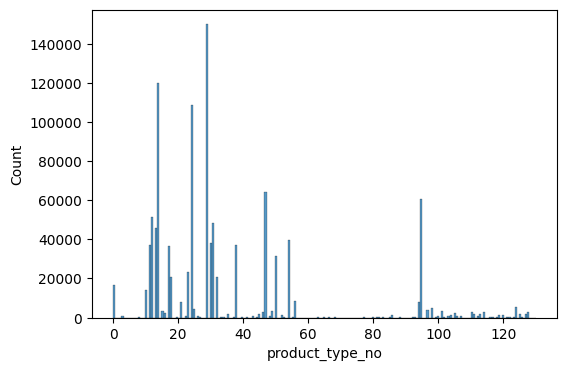

--------------------------------------------------------------------------------
Feature: graphical_appearance_no
count    1.062302e+06
mean     1.478559e+01
std      5.925573e+00
min      0.000000e+00
25%      1.600000e+01
50%      1.600000e+01
75%      1.600000e+01
max      2.900000e+01
Name: graphical_appearance_no, dtype: float64


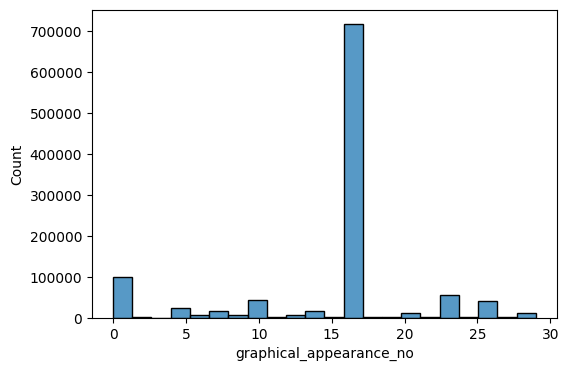

--------------------------------------------------------------------------------
Feature: colour_group_code
count    1.062302e+06
mean     2.938056e+01
std      1.785194e+01
min      0.000000e+00
25%      6.000000e+00
50%      3.800000e+01
75%      4.500000e+01
max      4.900000e+01
Name: colour_group_code, dtype: float64


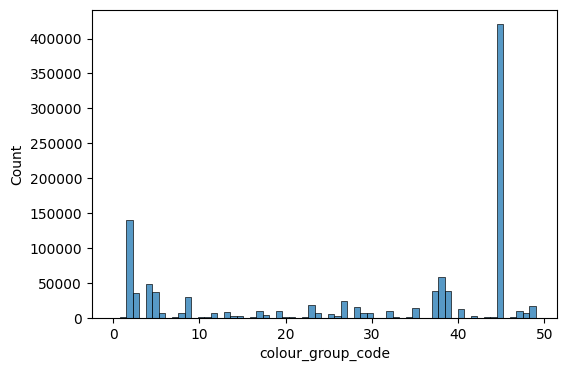

--------------------------------------------------------------------------------
Feature: perceived_colour_value_id
count    1.062302e+06
mean     3.177422e+00
std      1.293533e+00
min      0.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      7.000000e+00
Name: perceived_colour_value_id, dtype: float64


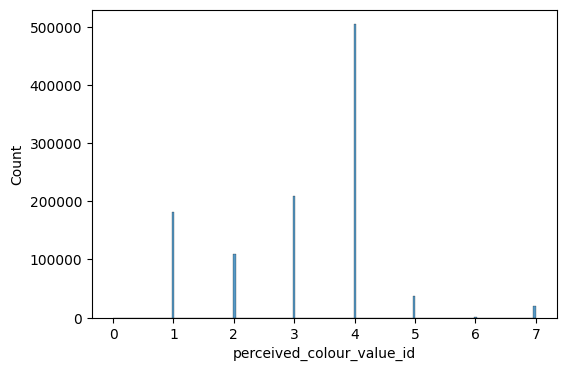

--------------------------------------------------------------------------------
Feature: perceived_colour_master_id
count    1.062302e+06
mean     1.305463e+01
std      4.805147e+00
min      0.000000e+00
25%      1.100000e+01
50%      1.500000e+01
75%      1.500000e+01
max      1.900000e+01
Name: perceived_colour_master_id, dtype: float64


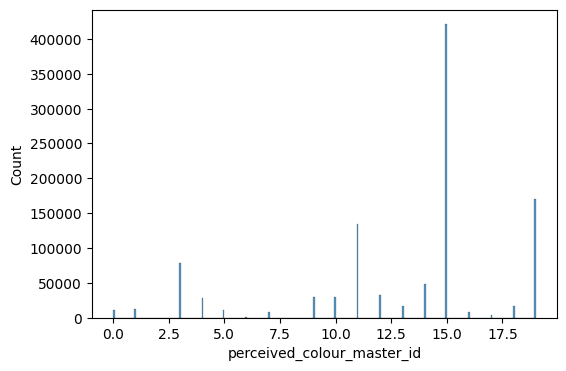

--------------------------------------------------------------------------------
Feature: department_no
count    1.062302e+06
mean     7.920828e+01
std      7.222527e+01
min      0.000000e+00
25%      3.100000e+01
50%      5.100000e+01
75%      1.390000e+02
max      2.970000e+02
Name: department_no, dtype: float64


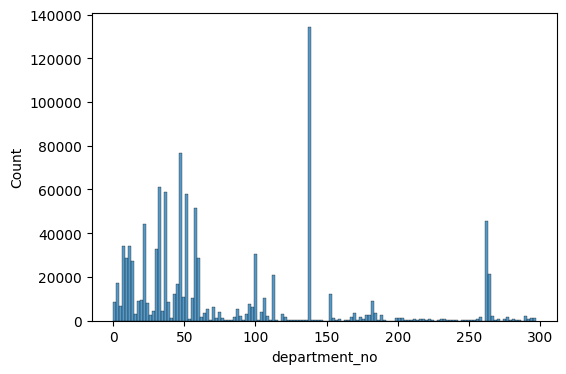

--------------------------------------------------------------------------------
Feature: index_code
count    1.062302e+06
mean     1.783675e+00
std      2.353307e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      9.000000e+00
Name: index_code, dtype: float64


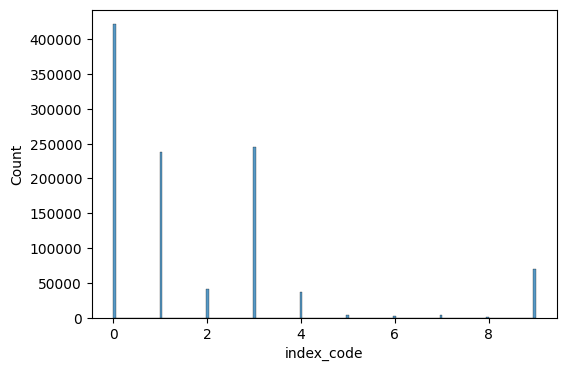

--------------------------------------------------------------------------------
Feature: index_group_no
count    1.062302e+06
mean     5.058900e-01
std      8.427417e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      4.000000e+00
Name: index_group_no, dtype: float64


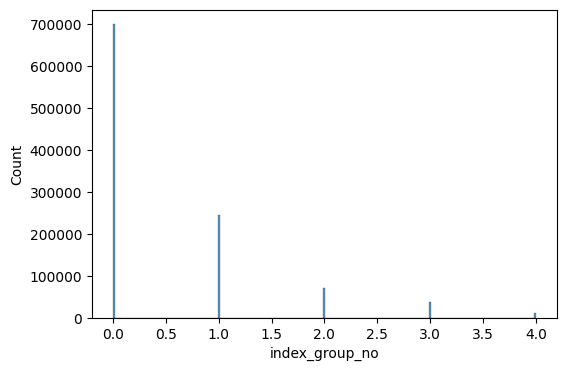

--------------------------------------------------------------------------------
Feature: section_no
count    1.062302e+06
mean     2.468286e+01
std      1.796575e+01
min      0.000000e+00
25%      2.000000e+00
50%      3.300000e+01
75%      4.100000e+01
max      5.600000e+01
Name: section_no, dtype: float64


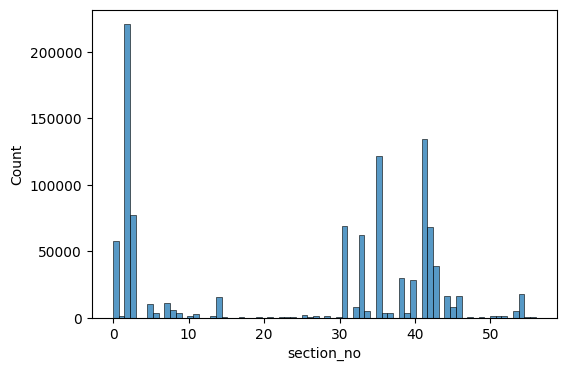

--------------------------------------------------------------------------------
Feature: garment_group_no
count    1.062302e+06
mean     8.424250e+00
std      5.962922e+00
min      0.000000e+00
25%      3.000000e+00
50%      7.000000e+00
75%      1.400000e+01
max      2.000000e+01
Name: garment_group_no, dtype: float64


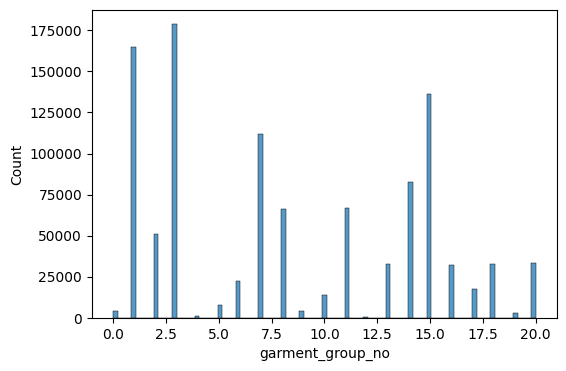

--------------------------------------------------------------------------------
Feature: club_member_status
count    1.062302e+06
mean     2.258586e-02
std      2.196268e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.000000e+00
Name: club_member_status, dtype: float64


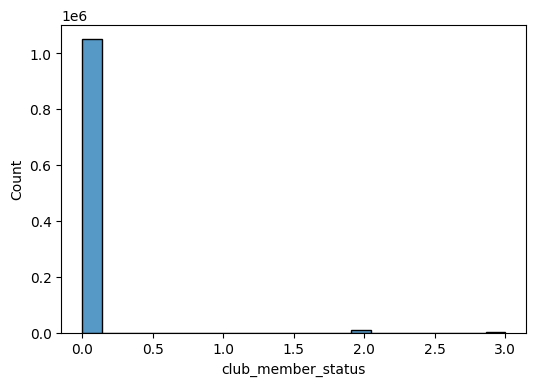

--------------------------------------------------------------------------------
Feature: fashion_news_frequency
count    1.062302e+06
mean     1.458532e+00
std      5.032292e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      3.000000e+00
Name: fashion_news_frequency, dtype: float64


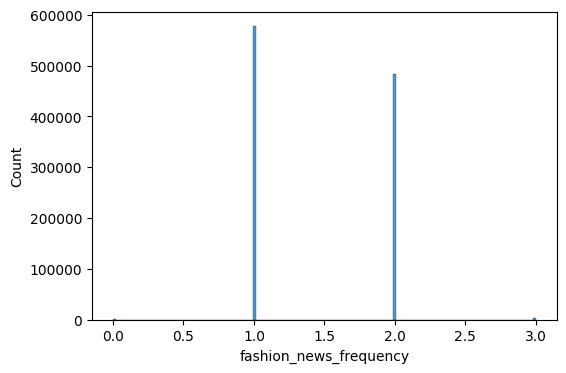

--------------------------------------------------------------------------------
Feature: postal_code
count    1.062302e+06
mean     9.502086e+04
std      5.552591e+04
min      0.000000e+00
25%      4.554000e+04
50%      9.433900e+04
75%      1.433170e+05
max      1.920430e+05
Name: postal_code, dtype: float64


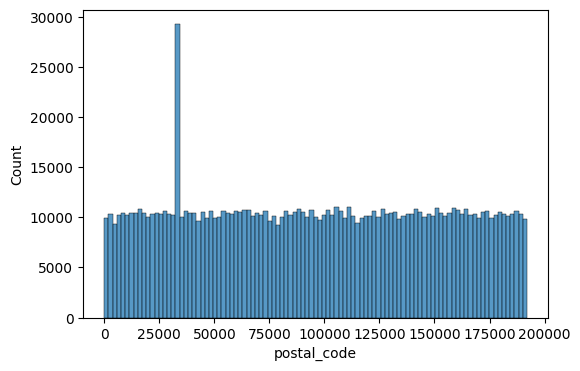

--------------------------------------------------------------------------------
Feature: age_bin
count    1.062302e+06
mean     2.445821e+00
std      1.427536e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      7.000000e+00
Name: age_bin, dtype: float64


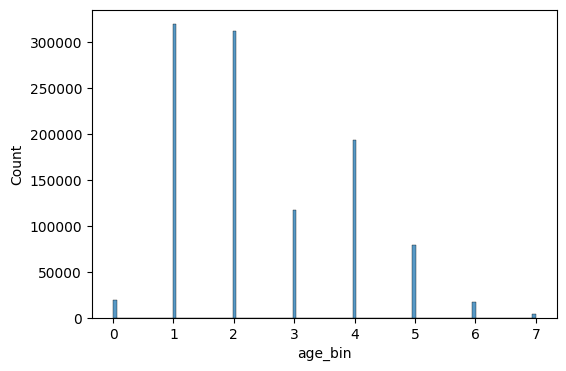

--------------------------------------------------------------------------------
Checks passed


In [23]:
test_lightgbm_data_features(results_train, verbose=True)

In [24]:
test_lightgbm_data_features(results_valid_train)

test_lightgbm_data_features(results_valid_inference)

test_lightgbm_data_features(results_test_inference)

Results use type: train, sample: train
Checking no missing values
Checking no duplicate columns
Checks passed
Results use type: inference, sample: valid
Checking no missing values
Checking no duplicate columns
Checks passed
Results use type: inference, sample: test
Checking no missing values
Checking no duplicate columns
Checks passed


### Embedding similarity


In [25]:
from src.utils.data_checks import test_input_embedding_similarity, test_input_customer_avg_price

In [26]:
customer_ids = results_train.data.customer_id.unique()[:3]
for customer_id in customer_ids:
    print(f"Testing customer {customer_id}")
    test_input_embedding_similarity(results_train, customer_dynamic_features, article_embeddings, customer_id)
    print("=" * 100)
    print("")

Testing customer 41318098387474
Unique week numbers for customer 41318098387474 [ 93  94  95  96  97  98  99 100 101 102]
Week number: 93
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
0,93,41318098387474,778064033,0.957765,0.767657


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
0,41318098387474,92,0.022017,"[0.005770983, -0.42972183, 0.15940754, 0.12657...","[1.4321077, 0.20973971, 0.09196462, 1.108316, ..."


Article ID: 778064033
Checks for article 778064033 passed
Week number: 94
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
1,94,41318098387474,814641001,0.966617,0.73279


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
1,41318098387474,93,0.022017,"[0.005770983, -0.42972183, 0.15940754, 0.12657...","[1.4321077, 0.20973971, 0.09196462, 1.108316, ..."


Article ID: 814641001
Checks for article 814641001 passed
Week number: 95
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
2,95,41318098387474,814641001,0.966617,0.73279


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
2,41318098387474,94,0.022017,"[0.005770983, -0.42972183, 0.15940754, 0.12657...","[1.4321077, 0.20973971, 0.09196462, 1.108316, ..."


Article ID: 814641001
Checks for article 814641001 passed
Week number: 96
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
3,96,41318098387474,865076002,0.964585,0.788029


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
3,41318098387474,95,0.022017,"[0.005770983, -0.42972183, 0.15940754, 0.12657...","[1.4321077, 0.20973971, 0.09196462, 1.108316, ..."


Article ID: 865076002
Checks for article 865076002 passed
Week number: 97
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
4,97,41318098387474,814641006,0.965603,0.777529


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
4,41318098387474,96,0.022017,"[0.005770983, -0.42972183, 0.15940754, 0.12657...","[1.4321077, 0.20973971, 0.09196462, 1.108316, ..."


Article ID: 814641006
Checks for article 814641006 passed
Week number: 98
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
5,98,41318098387474,579541075,0.975696,0.859319
6,98,41318098387474,857880004,0.965836,0.828478
7,98,41318098387474,923134003,0.975461,0.722557


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
5,41318098387474,97,0.022017,"[0.005770983, -0.42972183, 0.15940754, 0.12657...","[1.4321077, 0.20973971, 0.09196462, 1.108316, ..."


Article ID: 579541075
Checks for article 579541075 passed
Article ID: 857880004
Checks for article 857880004 passed
Article ID: 923134003
Checks for article 923134003 passed
Week number: 99
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
8,99,41318098387474,868879003,0.985219,0.83453


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
6,41318098387474,98,0.025407,"[0.01843689, -0.40559664, 0.1780397, 0.1298030...","[1.1559126, 0.19094084, 0.08677541, 0.95438147..."


Article ID: 868879003
Checks for article 868879003 passed
Week number: 100
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
9,100,41318098387474,814641006,0.957565,0.776447


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
7,41318098387474,99,0.025407,"[0.01843689, -0.40559664, 0.1780397, 0.1298030...","[1.1559126, 0.19094084, 0.08677541, 0.95438147..."


Article ID: 814641006
Checks for article 814641006 passed
Week number: 101
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
10,101,41318098387474,579541075,0.976513,0.83285


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
8,41318098387474,100,0.025407,"[0.01843689, -0.40559664, 0.1780397, 0.1298030...","[1.1559126, 0.19094084, 0.08677541, 0.95438147..."


Article ID: 579541075
Checks for article 579541075 passed
Week number: 102
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
11,102,41318098387474,865076002,0.948908,0.731855


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
9,41318098387474,101,0.025407,"[0.01843689, -0.40559664, 0.1780397, 0.1298030...","[1.1559126, 0.19094084, 0.08677541, 0.95438147..."


Article ID: 865076002
Checks for article 865076002 passed

Testing customer 200292573348128
Unique week numbers for customer 200292573348128 [ 93  94  95  96  97  98  99 100 101 102]
Week number: 93
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
12,93,200292573348128,448509014,0.946279,0.680188
13,93,200292573348128,806388002,0.932001,0.738842
14,93,200292573348128,866383006,0.970357,0.706654


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
13,200292573348128,92,0.030115,"[0.089311615, -0.39146373, 0.1314294, 0.166365...","[1.3027861, 0.36242968, 0.39205995, 1.0990999,..."


Article ID: 448509014
Checks for article 448509014 passed
Article ID: 806388002
Checks for article 806388002 passed
Article ID: 866383006
Checks for article 866383006 passed
Week number: 94
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
15,94,200292573348128,811925001,0.959667,0.749564


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
14,200292573348128,93,0.037824,"[0.10267614, -0.36750618, 0.09928386, 0.143778...","[1.3360159, 0.7223365, 0.21049602, 1.2658252, ..."


Article ID: 811925001
Checks for article 811925001 passed
Week number: 95
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
16,95,200292573348128,684209032,0.928324,0.805221
17,95,200292573348128,811925009,0.960141,0.675931
18,95,200292573348128,851110001,0.957294,0.763853


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
15,200292573348128,94,0.037824,"[0.10267614, -0.36750618, 0.09928386, 0.143778...","[1.3360159, 0.7223365, 0.21049602, 1.2658252, ..."


Article ID: 684209032
Checks for article 684209032 passed
Article ID: 811925009
Checks for article 811925009 passed
Article ID: 851110001
Checks for article 851110001 passed
Week number: 96
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
19,96,200292573348128,599580072,0.962878,0.729513
20,96,200292573348128,717490064,0.905447,0.819706
21,96,200292573348128,784332002,0.971907,0.850583


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
16,200292573348128,95,0.033186,"[0.12426563, -0.34646648, 0.17159535, 0.119795...","[1.1188469, 0.5889876, 0.578199, 0.6891696, 0...."


Article ID: 599580072
Checks for article 599580072 passed
Article ID: 717490064
Checks for article 717490064 passed
Article ID: 784332002
Checks for article 784332002 passed
Week number: 97
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
24,97,200292573348128,774450003,0.924494,0.696584


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
17,200292573348128,96,0.019305,"[0.1325456, -0.50878334, 0.15177843, 0.1608679...","[0.9882709, 0.250978, 0.35399115, 1.7156223, 0..."


Article ID: 774450003
Checks for article 774450003 passed
Week number: 98
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
25,98,200292573348128,748582008,0.939945,0.709989


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
18,200292573348128,97,0.019305,"[0.1325456, -0.50878334, 0.15177843, 0.1608679...","[0.9882709, 0.250978, 0.35399115, 1.7156223, 0..."


Article ID: 748582008
Checks for article 748582008 passed
Week number: 99
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
26,99,200292573348128,599580072,0.986541,0.774575
27,99,200292573348128,778064028,0.968004,0.701532
28,99,200292573348128,860819001,0.963791,0.721365


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
19,200292573348128,98,0.019305,"[0.1325456, -0.50878334, 0.15177843, 0.1608679...","[0.9882709, 0.250978, 0.35399115, 1.7156223, 0..."


Article ID: 599580072
Checks for article 599580072 passed
Article ID: 778064028
Checks for article 778064028 passed
Article ID: 860819001
Checks for article 860819001 passed
Week number: 100
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
29,100,200292573348128,599580086,0.948667,0.785949


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
20,200292573348128,99,0.026424,"[0.051990885, -0.4067433, 0.15000954, 0.084419...","[1.3606201, 0.13132492, 0.15388297, 1.0031347,..."


Article ID: 599580086
Checks for article 599580086 passed
Week number: 101
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
30,101,200292573348128,690936003,0.983656,0.866349


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
21,200292573348128,100,0.026424,"[0.051990885, -0.4067433, 0.15000954, 0.084419...","[1.3606201, 0.13132492, 0.15388297, 1.0031347,..."


Article ID: 690936003
Checks for article 690936003 passed
Week number: 102
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
31,102,200292573348128,751471001,0.978355,0.818563
32,102,200292573348128,896152001,0.957320,0.775952
33,102,200292573348128,916468003,0.969038,0.763708


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
22,200292573348128,101,0.026424,"[0.051990885, -0.4067433, 0.15000954, 0.084419...","[1.3606201, 0.13132492, 0.15388297, 1.0031347,..."


Article ID: 751471001
Checks for article 751471001 passed
Article ID: 896152001
Checks for article 896152001 passed
Article ID: 916468003
Checks for article 916468003 passed

Testing customer 649760207043851
Unique week numbers for customer 649760207043851 [ 93  94  95  96  97  98  99 100 101 102]
Week number: 93
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
34,93,649760207043851,556539039,0.982028,0.88804


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
39,649760207043851,92,0.012186,"[0.13548625, -0.36604458, 0.293206, 0.21669993...","[0.65993464, 0.49865252, 0.24711847, 0.6406711..."


Article ID: 556539039
Checks for article 556539039 passed
Week number: 94
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
35,94,649760207043851,556539039,0.982028,0.88804


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
40,649760207043851,93,0.012186,"[0.13548625, -0.36604458, 0.293206, 0.21669993...","[0.65993464, 0.49865252, 0.24711847, 0.6406711..."


Article ID: 556539039
Checks for article 556539039 passed
Week number: 95
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
36,95,649760207043851,556539039,0.982028,0.88804


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
41,649760207043851,94,0.012186,"[0.13548625, -0.36604458, 0.293206, 0.21669993...","[0.65993464, 0.49865252, 0.24711847, 0.6406711..."


Article ID: 556539039
Checks for article 556539039 passed
Week number: 96
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
37,96,649760207043851,751471001,0.912178,0.632446
38,96,649760207043851,760084003,0.843942,0.615788
39,96,649760207043851,866383006,0.948053,0.625988


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
42,649760207043851,95,0.012186,"[0.13548625, -0.36604458, 0.293206, 0.21669993...","[0.65993464, 0.49865252, 0.24711847, 0.6406711..."


Article ID: 751471001
Checks for article 751471001 passed
Article ID: 760084003
Checks for article 760084003 passed
Article ID: 866383006
Checks for article 866383006 passed
Week number: 97
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
40,97,649760207043851,855531007,0.92247,0.798471


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
43,649760207043851,96,0.014108,"[0.19459, -0.32651803, 0.23290901, 0.11172493,...","[1.2698116, 0.2462515, 0.8831957, 1.4673088, 0..."


Article ID: 855531007
Checks for article 855531007 passed
Week number: 98
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
41,98,649760207043851,696587001,0.960318,0.858834


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
44,649760207043851,97,0.014108,"[0.19459, -0.32651803, 0.23290901, 0.11172493,...","[1.2698116, 0.2462515, 0.8831957, 1.4673088, 0..."


Article ID: 696587001
Checks for article 696587001 passed
Week number: 99
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
42,99,649760207043851,811927004,0.949093,0.706424


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
45,649760207043851,98,0.014108,"[0.19459, -0.32651803, 0.23290901, 0.11172493,...","[1.2698116, 0.2462515, 0.8831957, 1.4673088, 0..."


Article ID: 811927004
Checks for article 811927004 passed
Week number: 100
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
43,100,649760207043851,811927004,0.949093,0.706424


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
46,649760207043851,99,0.014108,"[0.19459, -0.32651803, 0.23290901, 0.11172493,...","[1.2698116, 0.2462515, 0.8831957, 1.4673088, 0..."


Article ID: 811927004
Checks for article 811927004 passed
Week number: 101
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
44,101,649760207043851,696587001,0.960318,0.858834


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
47,649760207043851,100,0.014108,"[0.19459, -0.32651803, 0.23290901, 0.11172493,...","[1.2698116, 0.2462515, 0.8831957, 1.4673088, 0..."


Article ID: 696587001
Checks for article 696587001 passed
Week number: 102
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
45,102,649760207043851,556539028,0.935233,0.692019


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
48,649760207043851,101,0.014108,"[0.19459, -0.32651803, 0.23290901, 0.11172493,...","[1.2698116, 0.2462515, 0.8831957, 1.4673088, 0..."


Article ID: 556539028
Checks for article 556539028 passed



In [27]:
customer_ids = results_train.data.customer_id.unique()[:5]
for customer_id in customer_ids:
    print(f"Testing customer {customer_id}")
    test_input_customer_avg_price(results_train, customer_dynamic_features, customer_id)
    print("=" * 100)
    print("")

Testing customer 41318098387474
Customer 41318098387474 has 10 weeks: [ 93  94  95  96  97  98  99 100 101 102]
Week number: 93
Checks for customer 41318098387474 and week 93 passed
Week number: 94
Checks for customer 41318098387474 and week 94 passed
Week number: 95
Checks for customer 41318098387474 and week 95 passed
Week number: 96
Checks for customer 41318098387474 and week 96 passed
Week number: 97
Checks for customer 41318098387474 and week 97 passed
Week number: 98
Checks for customer 41318098387474 and week 98 passed
Week number: 99
Checks for customer 41318098387474 and week 99 passed
Week number: 100
Checks for customer 41318098387474 and week 100 passed
Week number: 101
Checks for customer 41318098387474 and week 101 passed
Week number: 102
Checks for customer 41318098387474 and week 102 passed

Testing customer 200292573348128
Customer 200292573348128 has 10 weeks: [ 93  94  95  96  97  98  99 100 101 102]
Week number: 93
Checks for customer 200292573348128 and week 93 pas

In [28]:
customer_ids = results_valid_inference.data.customer_id.unique()[:3]
for customer_id in customer_ids:
    print(f"Testing customer {customer_id}")
    test_input_embedding_similarity(results_valid_inference, customer_dynamic_features, article_embeddings, customer_id)
    print("=" * 100)
    print("")

Testing customer 1200402310946735
Unique week numbers for customer 1200402310946735 [103]
Week number: 103
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
0,103,1200402310946735,158340001,0.0,0.0
1,103,1200402310946735,448509014,0.0,0.0
2,103,1200402310946735,456163086,0.0,0.0


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
88,1200402310946735,102,0.02637,None,None


Article ID: 158340001
Checks for article 158340001 passed
Article ID: 448509014
Checks for article 448509014 passed
Article ID: 456163086
Checks for article 456163086 passed

Testing customer 3479232611267527
Unique week numbers for customer 3479232611267527 [103]
Week number: 103
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
30,103,3479232611267527,158340001,0.939925,0.734727
31,103,3479232611267527,448509014,0.938820,0.604015
32,103,3479232611267527,456163086,0.966300,0.791707


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
257,3479232611267527,102,0.019483,"[0.02754023, -0.51207113, 0.0004328601, 0.0609...","[0.7044734, 0.4798912, 0.7825377, 1.8284426, 0..."


Article ID: 158340001
Checks for article 158340001 passed
Article ID: 448509014
Checks for article 448509014 passed
Article ID: 456163086
Checks for article 456163086 passed

Testing customer 5027918474929583
Unique week numbers for customer 5027918474929583 [103]
Week number: 103
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
62,103,5027918474929583,158340001,0.949722,0.645146
63,103,5027918474929583,448509014,0.940023,0.611476
64,103,5027918474929583,456163086,0.962885,0.823747


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
413,5027918474929583,102,0.01778,"[0.14401557, -0.42266604, 0.100788616, 0.08187...","[0.8317854, 0.40209353, 0.19237538, 1.7235085,..."


Article ID: 158340001
Checks for article 158340001 passed
Article ID: 448509014
Checks for article 448509014 passed
Article ID: 456163086
Checks for article 456163086 passed



In [29]:
customer_ids = results_valid_train.data.customer_id.unique()[:5]
for customer_id in customer_ids:
    print(f"Testing customer {customer_id}")
    test_input_customer_avg_price(results_valid_train, customer_dynamic_features, customer_id)
    print("=" * 100)
    print("")

Testing customer 1200402310946735
Customer 1200402310946735 has 1 weeks: [103]
Week number: 103
Checks for customer 1200402310946735 and week 103 passed

Testing customer 3479232611267527
Customer 3479232611267527 has 1 weeks: [103]
Week number: 103
Checks for customer 3479232611267527 and week 103 passed

Testing customer 5027918474929583
Customer 5027918474929583 has 1 weeks: [103]
Week number: 103
Checks for customer 5027918474929583 and week 103 passed

Testing customer 6514467256184302
Customer 6514467256184302 has 1 weeks: [103]
Week number: 103
Checks for customer 6514467256184302 and week 103 passed

Testing customer 6851699110500037
Customer 6851699110500037 has 1 weeks: [103]
Week number: 103
Checks for customer 6851699110500037 and week 103 passed



In [30]:
customer_ids = results_valid_inference.data.customer_id.unique()[:3]
for customer_id in customer_ids:
    print(f"Testing customer {customer_id}")
    test_input_embedding_similarity(results_valid_inference, customer_dynamic_features, article_embeddings, customer_id)
    print("=" * 100)
    print("")

Testing customer 1200402310946735
Unique week numbers for customer 1200402310946735 [103]
Week number: 103
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
0,103,1200402310946735,158340001,0.0,0.0
1,103,1200402310946735,448509014,0.0,0.0
2,103,1200402310946735,456163086,0.0,0.0


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
88,1200402310946735,102,0.02637,None,None


Article ID: 158340001
Checks for article 158340001 passed
Article ID: 448509014
Checks for article 448509014 passed
Article ID: 456163086
Checks for article 456163086 passed

Testing customer 3479232611267527
Unique week numbers for customer 3479232611267527 [103]
Week number: 103
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
30,103,3479232611267527,158340001,0.939925,0.734727
31,103,3479232611267527,448509014,0.938820,0.604015
32,103,3479232611267527,456163086,0.966300,0.791707


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
257,3479232611267527,102,0.019483,"[0.02754023, -0.51207113, 0.0004328601, 0.0609...","[0.7044734, 0.4798912, 0.7825377, 1.8284426, 0..."


Article ID: 158340001
Checks for article 158340001 passed
Article ID: 448509014
Checks for article 448509014 passed
Article ID: 456163086
Checks for article 456163086 passed

Testing customer 5027918474929583
Unique week numbers for customer 5027918474929583 [103]
Week number: 103
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
62,103,5027918474929583,158340001,0.949722,0.645146
63,103,5027918474929583,448509014,0.940023,0.611476
64,103,5027918474929583,456163086,0.962885,0.823747


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
413,5027918474929583,102,0.01778,"[0.14401557, -0.42266604, 0.100788616, 0.08187...","[0.8317854, 0.40209353, 0.19237538, 1.7235085,..."


Article ID: 158340001
Checks for article 158340001 passed
Article ID: 448509014
Checks for article 448509014 passed
Article ID: 456163086
Checks for article 456163086 passed



In [31]:
customer_ids = results_valid_inference.data.customer_id.unique()[:5]
for customer_id in customer_ids:
    print(f"Testing customer {customer_id}")
    test_input_customer_avg_price(results_valid_inference, customer_dynamic_features, customer_id)
    print("=" * 100)
    print("")

Testing customer 1200402310946735
Customer 1200402310946735 has 1 weeks: [103]
Week number: 103
Checks for customer 1200402310946735 and week 103 passed

Testing customer 3479232611267527
Customer 3479232611267527 has 1 weeks: [103]
Week number: 103
Checks for customer 3479232611267527 and week 103 passed

Testing customer 5027918474929583
Customer 5027918474929583 has 1 weeks: [103]
Week number: 103
Checks for customer 5027918474929583 and week 103 passed

Testing customer 6514467256184302
Customer 6514467256184302 has 1 weeks: [103]
Week number: 103
Checks for customer 6514467256184302 and week 103 passed

Testing customer 6851699110500037
Customer 6851699110500037 has 1 weeks: [103]
Week number: 103
Checks for customer 6851699110500037 and week 103 passed



In [32]:
customer_ids = results_test_inference.data.customer_id.unique()[:3]
for customer_id in customer_ids:
    print(f"Testing customer {customer_id}")
    test_input_embedding_similarity(results_test_inference, customer_dynamic_features, article_embeddings, customer_id)
    print("=" * 100)
    print("")

Testing customer 1827730561464445
Unique week numbers for customer 1827730561464445 [104]
Week number: 104
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
0,104,1827730561464445,158340001,0.919324,0.655054
1,104,1827730561464445,448509014,0.974497,0.804475
2,104,1827730561464445,547780001,0.990005,0.936955


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
167,1827730561464445,103,0.025407,"[0.11346084, -0.33399263, 0.08457478, 0.106714...","[1.0963573, 0.19552906, 0.15521294, 0.3109725,..."


Article ID: 158340001
Checks for article 158340001 passed
Article ID: 448509014
Checks for article 448509014 passed
Article ID: 547780001
Checks for article 547780001 passed

Testing customer 7694319197314000
Unique week numbers for customer 7694319197314000 [104]
Week number: 104
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
42,104,7694319197314000,158340001,0.930769,0.657049
43,104,7694319197314000,448509014,0.954133,0.642340
44,104,7694319197314000,673677002,0.952920,0.759427


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
726,7694319197314000,103,0.035054,"[0.0062295003, -0.4851237, 0.10118177, 0.11256...","[0.68698484, 0.52272135, 0.041748703, 1.175217..."


Article ID: 158340001
Checks for article 158340001 passed
Article ID: 448509014
Checks for article 448509014 passed
Article ID: 673677002
Checks for article 673677002 passed

Testing customer 11484807043854349
Unique week numbers for customer 11484807043854349 [104]
Week number: 104
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
84,104,11484807043854349,158340001,0.948839,0.673797
85,104,11484807043854349,448509014,0.949453,0.632543
86,104,11484807043854349,673677002,0.947275,0.721030


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
1077,11484807043854349,103,0.033881,"[0.12251574, -0.4191013, 0.18715999, 0.1516905...","[0.85502505, 1.2083108, 1.2461734, 0.40808234,..."


Article ID: 158340001
Checks for article 158340001 passed
Article ID: 448509014
Checks for article 448509014 passed
Article ID: 673677002
Checks for article 673677002 passed



In [33]:
customer_ids = results_test_inference.data.customer_id.unique()[:5]
for customer_id in customer_ids:
    print(f"Testing customer {customer_id}")
    test_input_customer_avg_price(results_test_inference, customer_dynamic_features, customer_id)
    print("=" * 100)
    print("")

Testing customer 1827730561464445
Customer 1827730561464445 has 1 weeks: [104]
Week number: 104
Checks for customer 1827730561464445 and week 104 passed

Testing customer 7694319197314000
Customer 7694319197314000 has 1 weeks: [104]
Week number: 104
Checks for customer 7694319197314000 and week 104 passed

Testing customer 11484807043854349
Customer 11484807043854349 has 1 weeks: [104]
Week number: 104
Checks for customer 11484807043854349 and week 104 passed

Testing customer 14530095987536234
Customer 14530095987536234 has 1 weeks: [104]
Week number: 104
Checks for customer 14530095987536234 and week 104 passed

Testing customer 14548515405367279
Customer 14548515405367279 has 1 weeks: [104]
Week number: 104
Checks for customer 14548515405367279 and week 104 passed



## Articles dynamic features

- check that we join with the correct weeks


In [34]:
from src.utils.data_checks import test_input_articles_dynamic_features
from src.features_articles import ArticleDynamicFeatureResult, get_path_to_article_features

In [35]:
path_to_article_features_train = get_path_to_article_features(feature_type="dynamic", subsample=subsample, seed=seed)
article_dynamic_features = ArticleDynamicFeatureResult.load(path_to_article_features_train)

2025-06-05 12:48:04,866 - src.features_articles - INFO - Loading article dynamic feature result from ../data/preprocessed/articles_dynamic/subsample_0.25_42
2025-06-05 12:48:04,897 - src.features_articles - INFO - Loaded data from ../data/preprocessed/articles_dynamic/subsample_0.25_42/data.parquet
2025-06-05 12:48:04,899 - src.features_articles - INFO - Loaded feature names from ../data/preprocessed/articles_dynamic/subsample_0.25_42/feature_names.json


In [36]:
test_input_articles_dynamic_features(article_dynamic_features, results_train)

Week number: 93


,customer_id,week_num,article_id,weekly_sales_count,weekly_avg_price,cumulative_sales_count,cumulative_mean_age
0,41318098387474,93,778064033,8.0,0.008320,218.0,35.770642
12,200292573348128,93,448509014,141.0,0.039514,1915.0,30.427676
13,200292573348128,93,806388002,139.0,0.013047,1471.0,30.597553


Article ID: 778064033


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
879463,778064033,92,8.0,0.00832,35.770642,218.0


Checks for article 778064033 and week 93 passed
--------------------------------------------------------------------------------
Article ID: 448509014


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
35451,448509014,92,141.0,0.039514,30.427676,1915.0


Checks for article 448509014 and week 93 passed
--------------------------------------------------------------------------------
Article ID: 806388002


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
965900,806388002,92,139.0,0.013047,30.597553,1471.0


Checks for article 806388002 and week 93 passed
--------------------------------------------------------------------------------
Week number: 94


,customer_id,week_num,article_id,weekly_sales_count,weekly_avg_price,cumulative_sales_count,cumulative_mean_age
1,41318098387474,94,814641001,6.0,0.016932,124.0,40.709677
15,200292573348128,94,811925001,21.0,0.029115,450.0,29.655556
35,649760207043851,94,556539039,5.0,0.005068,33.0,35.484848


Article ID: 814641001


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
993604,814641001,93,6.0,0.016932,40.709677,124.0


Checks for article 814641001 and week 94 passed
--------------------------------------------------------------------------------
Article ID: 811925001


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
984920,811925001,93,21.0,0.029115,29.655556,450.0


Checks for article 811925001 and week 94 passed
--------------------------------------------------------------------------------
Article ID: 556539039


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
140180,556539039,93,5.0,0.005068,35.484848,33.0


Checks for article 556539039 and week 94 passed
--------------------------------------------------------------------------------
Week number: 95


,customer_id,week_num,article_id,weekly_sales_count,weekly_avg_price,cumulative_sales_count,cumulative_mean_age
2,41318098387474,95,814641001,7.0,0.016932,131.0,40.412214
16,200292573348128,95,684209032,7.0,0.024622,562.0,32.617438
17,200292573348128,95,811925009,31.0,0.030393,911.0,30.700329


Article ID: 814641001


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
993605,814641001,94,7.0,0.016932,40.412214,131.0


Checks for article 814641001 and week 95 passed
--------------------------------------------------------------------------------
Article ID: 684209032


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
520795,684209032,94,7.0,0.024622,32.617438,562.0


Checks for article 684209032 and week 95 passed
--------------------------------------------------------------------------------
Article ID: 811925009


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
984973,811925009,94,31.0,0.030393,30.700329,911.0


Checks for article 811925009 and week 95 passed
--------------------------------------------------------------------------------
Week number: 96


,customer_id,week_num,article_id,weekly_sales_count,weekly_avg_price,cumulative_sales_count,cumulative_mean_age
3,41318098387474,96,865076002,30.0,0.008349,364.0,37.280220
19,200292573348128,96,599580072,83.0,0.015577,520.0,34.159615
20,200292573348128,96,717490064,82.0,0.008188,608.0,33.215461


Article ID: 865076002


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
1124295,865076002,95,30.0,0.008349,37.28022,364.0


Checks for article 865076002 and week 96 passed
--------------------------------------------------------------------------------
Article ID: 599580072


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
243935,599580072,95,83.0,0.015577,34.159615,520.0


Checks for article 599580072 and week 96 passed
--------------------------------------------------------------------------------
Article ID: 717490064


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
667930,717490064,95,82.0,0.008188,33.215461,608.0


Checks for article 717490064 and week 96 passed
--------------------------------------------------------------------------------
Week number: 97


,customer_id,week_num,article_id,weekly_sales_count,weekly_avg_price,cumulative_sales_count,cumulative_mean_age
4,41318098387474,97,814641006,7.0,0.016932,132.0,41.462121
24,200292573348128,97,774450003,4.0,0.030492,186.0,38.752688
40,649760207043851,97,855531007,0.0,0.015237,31.0,32.387097


Article ID: 814641006


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
993633,814641006,96,7.0,0.016932,41.462121,132.0


Checks for article 814641006 and week 97 passed
--------------------------------------------------------------------------------
Article ID: 774450003


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
869912,774450003,96,4.0,0.030492,38.752688,186.0


Checks for article 774450003 and week 97 passed
--------------------------------------------------------------------------------
Article ID: 855531007


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
1098959,855531007,96,0.0,0.015237,32.387097,31.0


Checks for article 855531007 and week 97 passed
--------------------------------------------------------------------------------
Week number: 98


,customer_id,week_num,article_id,weekly_sales_count,weekly_avg_price,cumulative_sales_count,cumulative_mean_age
5,41318098387474,98,579541075,17.0,0.016466,462.0,45.272727
6,41318098387474,98,857880004,0.0,0.010153,225.0,32.186667
7,41318098387474,98,923134003,104.0,0.024650,114.0,32.298246


Article ID: 579541075


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
199945,579541075,97,17.0,0.016466,45.272727,462.0


Checks for article 579541075 and week 98 passed
--------------------------------------------------------------------------------
Article ID: 857880004


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
1105317,857880004,97,0.0,0.010153,32.186667,225.0


Checks for article 857880004 and week 98 passed
--------------------------------------------------------------------------------
Article ID: 923134003


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
1228596,923134003,97,104.0,0.02465,32.298246,114.0


Checks for article 923134003 and week 98 passed
--------------------------------------------------------------------------------
Week number: 99


,customer_id,week_num,article_id,weekly_sales_count,weekly_avg_price,cumulative_sales_count,cumulative_mean_age
8,41318098387474,99,868879003,18.0,0.032484,116.0,42.491379
26,200292573348128,99,599580072,109.0,0.016417,717.0,34.345886
27,200292573348128,99,778064028,95.0,0.003888,1265.0,33.732016


Article ID: 868879003


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
1136297,868879003,98,18.0,0.032484,42.491379,116.0


Checks for article 868879003 and week 99 passed
--------------------------------------------------------------------------------
Article ID: 599580072


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
243938,599580072,98,109.0,0.016417,34.345886,717.0


Checks for article 599580072 and week 99 passed
--------------------------------------------------------------------------------
Article ID: 778064028


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
879443,778064028,98,95.0,0.003888,33.732016,1265.0


Checks for article 778064028 and week 99 passed
--------------------------------------------------------------------------------
Week number: 100


,customer_id,week_num,article_id,weekly_sales_count,weekly_avg_price,cumulative_sales_count,cumulative_mean_age
9,41318098387474,100,814641006,2.0,0.015678,141.0,41.836879
29,200292573348128,100,599580086,3.0,0.011847,231.0,33.450216
43,649760207043851,100,811927004,10.0,0.012585,798.0,30.370927


Article ID: 814641006


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
993636,814641006,99,2.0,0.015678,41.836879,141.0


Checks for article 814641006 and week 100 passed
--------------------------------------------------------------------------------
Article ID: 599580086


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
243991,599580086,99,3.0,0.011847,33.450216,231.0


Checks for article 599580086 and week 100 passed
--------------------------------------------------------------------------------
Article ID: 811927004


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
985030,811927004,99,10.0,0.012585,30.370927,798.0


Checks for article 811927004 and week 100 passed
--------------------------------------------------------------------------------
Week number: 101


,customer_id,week_num,article_id,weekly_sales_count,weekly_avg_price,cumulative_sales_count,cumulative_mean_age
10,41318098387474,101,579541075,19.0,0.016277,505.0,45.380198
30,200292573348128,101,690936003,2.0,0.050831,499.0,42.352705
44,649760207043851,101,696587001,0.0,0.010153,150.0,37.346667


Article ID: 579541075


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
199948,579541075,100,19.0,0.016277,45.380198,505.0


Checks for article 579541075 and week 101 passed
--------------------------------------------------------------------------------
Article ID: 690936003


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
548777,690936003,100,2.0,0.050831,42.352705,499.0


Checks for article 690936003 and week 101 passed
--------------------------------------------------------------------------------
Article ID: 696587001


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
577000,696587001,100,0.0,0.010153,37.346667,150.0


Checks for article 696587001 and week 101 passed
--------------------------------------------------------------------------------
Week number: 102


,customer_id,week_num,article_id,weekly_sales_count,weekly_avg_price,cumulative_sales_count,cumulative_mean_age
11,41318098387474,102,865076002,7.0,0.008274,444.0,36.966216
31,200292573348128,102,751471001,227.0,0.033385,3135.0,38.141308
32,200292573348128,102,896152001,97.0,0.033318,331.0,41.613293


Article ID: 865076002


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
1124301,865076002,101,7.0,0.008274,36.966216,444.0


Checks for article 865076002 and week 102 passed
--------------------------------------------------------------------------------
Article ID: 751471001


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
790149,751471001,101,227.0,0.033385,38.141308,3135.0


Checks for article 751471001 and week 102 passed
--------------------------------------------------------------------------------
Article ID: 896152001


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
1195645,896152001,101,97.0,0.033318,41.613293,331.0


Checks for article 896152001 and week 102 passed
--------------------------------------------------------------------------------
